# Machine Learning Ex 1 for Recoloring b/w photos

In [1]:
#@title
!git clone https://github.com/jantic/DeOldify.git DeOldify 

Cloning into 'DeOldify'...
remote: Enumerating objects: 2344, done.
remote: Counting objects: 100% (116/116), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 2344 (delta 60), reused 81 (delta 42), pack-reused 2228
Receiving objects: 100% (2344/2344), 69.46 MiB | 11.85 MiB/s, done.
Resolving deltas: 100% (1068/1068), done.


In [2]:
#@title
import os

In [3]:
#@title
os.chdir('DeOldify')

In [4]:
#@title
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

In [5]:
#@title
!pip install -r colab_requirements.txt

     |████████████████████████████████| 214 kB 4.3 MB/s 
     |████████████████████████████████| 129 kB 47.2 MB/s 
     |████████████████████████████████| 1.9 MB 47.9 MB/s 
     |████████████████████████████████| 78 kB 5.9 MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-py3-none-any.whl size=26325 sha256=53d9b303c301d2e99967a054769d77e5d8d304198da2f0e75dbe763cce639f18
  Stored in directory: /root/.cache/pip/wheels/35/f3/15/01aa6571f0a72ee6ae7b827c1491c37a1f72d686fd22b43b0e
Successfully built typing
  Attempting uninstall: fastai
    Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [6]:
#@title
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

In [ ]:
#@title
!mkdir 'models'
!wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth

--2022-04-26 10:24:01--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 138.201.36.183
Connecting to data.deepai.org (data.deepai.org)|138.201.36.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

olorizeArtistic_gen  78%[==============>     ] 191.43M  11.3MB/s    eta 5s     

In [ ]:
#@title
!wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

In [ ]:
#@title
colorizer = get_image_colorizer(artistic=True)

#◢ Colorize!!

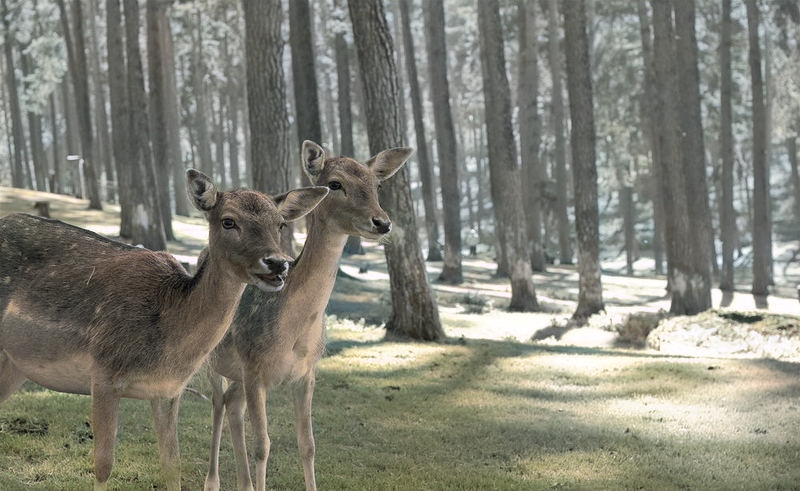

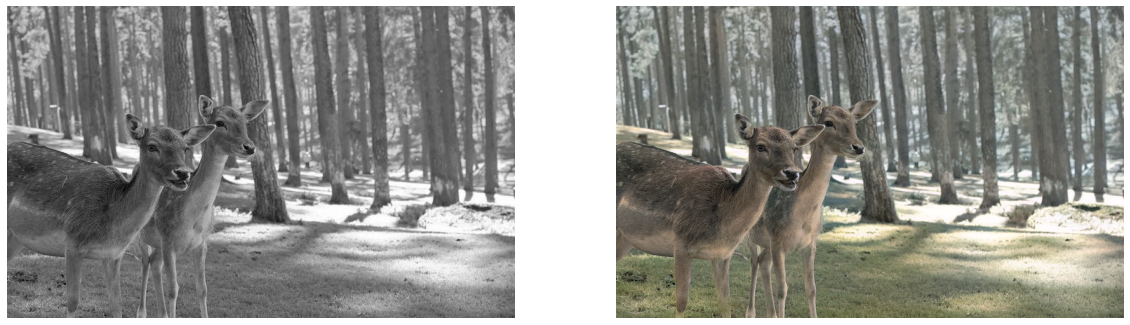

In [15]:
source_url = 'https://www.lunapic.com/editor/premade/effect-bw.gif' #@param {type:"string"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
watermarked = False #@param {type:"boolean"}

if source_url is not None and source_url !='':
    image_path = colorizer.plot_transformed_image_from_url(url=source_url, render_factor=render_factor, compare=True, watermarked=watermarked)
    print('done')
    show_image_in_notebook(image_path)
else:
    print('Provide an image url and try again.')